In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import BernoulliNB ## check
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Random Forest

In [3]:
data = pd.read_csv(r"...\wdbc.data", header = None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave', 'points_worst_symmetry_worst', 'fractal_dimension_worst']

In [7]:
data.columns = cols

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave,points_worst_symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.drop('id',axis=1,inplace=True)

In [10]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [11]:
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']

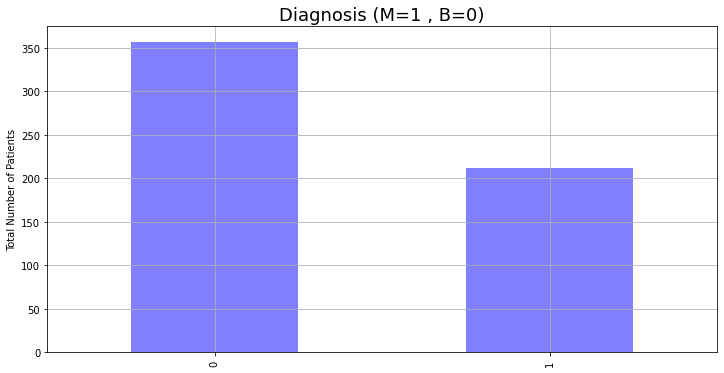

In [12]:
datas.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")
plt.grid(b=True)

In [14]:
data_mean = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [17]:
predictors = data_mean.columns[2:11]
target = "diagnosis"

X = data_mean.loc[:,predictors]
y = np.ravel(data.loc[:,[target]])

# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print ('Shape of training set : %i || Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]) )
print ('The dataset is very small so simple cross-validation approach should work here')
print ('There are very few data points so 10-fold cross validation should give us a better estimate')

Shape of training set : 426 || Shape of test set : 143
The dataset is very small so simple cross-validation approach should work here
There are very few data points so 10-fold cross validation should give us a better estimate


In [18]:
for i in range(1, 21):
    rf = RandomForestClassifier(n_estimators = i)
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.9
N = 2 :: Score = 0.9
N = 3 :: Score = 0.91
N = 4 :: Score = 0.92
N = 5 :: Score = 0.93
N = 6 :: Score = 0.93
N = 7 :: Score = 0.93
N = 8 :: Score = 0.94
N = 9 :: Score = 0.94
N = 10 :: Score = 0.93
N = 11 :: Score = 0.93
N = 12 :: Score = 0.93
N = 13 :: Score = 0.92
N = 14 :: Score = 0.93
N = 15 :: Score = 0.94
N = 16 :: Score = 0.94
N = 17 :: Score = 0.93
N = 18 :: Score = 0.93
N = 19 :: Score = 0.94
N = 20 :: Score = 0.93


In [19]:
print("Here we see that the random forest with 13 trees gives a reasonable estimate for the test data")

Here we see that the random forest with 13 trees gives a reasonable estimate for the test data


In [20]:
rf = RandomForestClassifier(n_estimators=13)

rf = rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.93


In [21]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        90
           1       0.88      0.94      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



## Neural Network

In [26]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [23]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave,points_worst_symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
cols = data.columns
x_data = data[cols[1:-1]]
print(len(cols))
x_data.head()

31


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave,points_worst_symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [29]:
y_data = data[cols[0]]
# le = LabelEncoder()
# y_data = np.array(le.fit_transform(y_data))
y_data[:5], le.classes_

(array([1, 1, 1, 1, 1], dtype=int64), array([0, 1], dtype=int64))

In [30]:
y_data.shape, x_data.values.shape

((569,), (569, 29))

In [33]:
x_data = Variable(torch.from_numpy(x_data.values))
y_data = Variable(torch.from_numpy(y_data))

In [89]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(29,16)
        self.l2 = torch.nn.Linear(16,16)
        self.l3 = torch.nn.Linear(16,4)
        self.l4 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        self.softmax = torch.nn.Softmax()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        y_pred = self.sigmoid(self.l4(out3))
        return y_pred
    
model = Model()

In [90]:
x_data.float().size(), y_data.float().size()

(torch.Size([569, 29]), torch.Size([569]))

In [91]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epochs in range(500):
    y_pred = model(x_data.float())
    loss = criterion(y_pred, y_data.view(-1,1).float())
    print('Epoch',epochs,'Loss:',loss.item(), '- Pred:', y_pred.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 Loss: 376.3933410644531 - Pred: tensor([0.3920])
Epoch 1 Loss: 376.2285461425781 - Pred: tensor([0.3906])
Epoch 2 Loss: 376.090087890625 - Pred: tensor([0.3892])
Epoch 3 Loss: 375.9734191894531 - Pred: tensor([0.3880])
Epoch 4 Loss: 375.88067626953125 - Pred: tensor([0.3867])
Epoch 5 Loss: 375.7976989746094 - Pred: tensor([0.3853])
Epoch 6 Loss: 375.73760986328125 - Pred: tensor([0.3840])
Epoch 7 Loss: 375.6912536621094 - Pred: tensor([0.3827])
Epoch 8 Loss: 375.6540222167969 - Pred: tensor([0.3814])
Epoch 9 Loss: 375.6209411621094 - Pred: tensor([0.3802])
Epoch 10 Loss: 375.5909118652344 - Pred: tensor([0.3789])
Epoch 11 Loss: 375.5635070800781 - Pred: tensor([0.3778])
Epoch 12 Loss: 375.540283203125 - Pred: tensor([0.3766])
Epoch 13 Loss: 375.5171203613281 - Pred: tensor([0.3756])
Epoch 14 Loss: 375.4915466308594 - Pred: tensor([0.3746])
Epoch 15 Loss: 375.46490478515625 - Pred: tensor([0.3736])
Epoch 16 Loss: 375.42596435546875 - Pred: tensor([0.3728])
Epoch 17 Loss: 375.382

Epoch 175 Loss: 336.8705139160156 - Pred: tensor([0.3882])
Epoch 176 Loss: 336.3378601074219 - Pred: tensor([0.3885])
Epoch 177 Loss: 335.80181884765625 - Pred: tensor([0.3889])
Epoch 178 Loss: 335.26165771484375 - Pred: tensor([0.3893])
Epoch 179 Loss: 334.7159729003906 - Pred: tensor([0.3897])
Epoch 180 Loss: 334.16705322265625 - Pred: tensor([0.3901])
Epoch 181 Loss: 333.6130065917969 - Pred: tensor([0.3905])
Epoch 182 Loss: 333.054931640625 - Pred: tensor([0.3909])
Epoch 183 Loss: 332.49176025390625 - Pred: tensor([0.3913])
Epoch 184 Loss: 331.92498779296875 - Pred: tensor([0.3918])
Epoch 185 Loss: 331.3527526855469 - Pred: tensor([0.3922])
Epoch 186 Loss: 330.77655029296875 - Pred: tensor([0.3927])
Epoch 187 Loss: 330.19549560546875 - Pred: tensor([0.3932])
Epoch 188 Loss: 329.610107421875 - Pred: tensor([0.3936])
Epoch 189 Loss: 329.01983642578125 - Pred: tensor([0.3941])
Epoch 190 Loss: 328.4262390136719 - Pred: tensor([0.3946])
Epoch 191 Loss: 327.8267517089844 - Pred: tensor([

Epoch 338 Loss: 231.191162109375 - Pred: tensor([0.5101])
Epoch 339 Loss: 230.641357421875 - Pred: tensor([0.5109])
Epoch 340 Loss: 230.10658264160156 - Pred: tensor([0.5117])
Epoch 341 Loss: 229.55682373046875 - Pred: tensor([0.5124])
Epoch 342 Loss: 228.99957275390625 - Pred: tensor([0.5132])
Epoch 343 Loss: 228.4578094482422 - Pred: tensor([0.5141])
Epoch 344 Loss: 227.92666625976562 - Pred: tensor([0.5148])
Epoch 345 Loss: 227.39154052734375 - Pred: tensor([0.5157])
Epoch 346 Loss: 226.8502960205078 - Pred: tensor([0.5165])
Epoch 347 Loss: 226.3055419921875 - Pred: tensor([0.5174])
Epoch 348 Loss: 225.76634216308594 - Pred: tensor([0.5182])
Epoch 349 Loss: 225.23411560058594 - Pred: tensor([0.5190])
Epoch 350 Loss: 224.70816040039062 - Pred: tensor([0.5198])
Epoch 351 Loss: 224.18943786621094 - Pred: tensor([0.5206])
Epoch 352 Loss: 223.6812286376953 - Pred: tensor([0.5214])
Epoch 353 Loss: 223.20127868652344 - Pred: tensor([0.5222])
Epoch 354 Loss: 222.72604370117188 - Pred: tenso

Epoch 494 Loss: 167.4990234375 - Pred: tensor([0.6147])
Epoch 495 Loss: 167.21263122558594 - Pred: tensor([0.6152])
Epoch 496 Loss: 166.94313049316406 - Pred: tensor([0.6157])
Epoch 497 Loss: 166.67884826660156 - Pred: tensor([0.6163])
Epoch 498 Loss: 166.43968200683594 - Pred: tensor([0.6167])
Epoch 499 Loss: 166.172607421875 - Pred: tensor([0.6173])


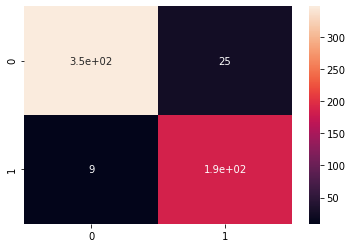

In [97]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);

In [98]:
print(classification_report(a,b))

              precision    recall  f1-score   support

       False       0.97      0.93      0.95       373
        True       0.88      0.95      0.92       196

    accuracy                           0.94       569
   macro avg       0.93      0.94      0.94       569
weighted avg       0.94      0.94      0.94       569

